## Transfer Learning VGG 16 and VGG 19 using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/apple_corn'
valid_path = '/content/drive/MyDrive/Datasets/Test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/apple_corn*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(8, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (224,224,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(8,activation = "softmax")   #Adding the Output Layer
])

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/apple_corn',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6827 images belonging to 8 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3772 images belonging to 8 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
214/214 [==============================] - 4995s 23s/step - loss: 2.3577 - accuracy: 0.4555 - val_loss: 2.3118 - val_accuracy: 0.4165
Epoch 2/50
214/214 [==============================] - 1648s 8s/step - loss: 1.2323 - accuracy: 0.5951 - val_loss: 2.2361 - val_accuracy: 0.4700
Epoch 3/50
214/214 [==============================] - 1664s 8s/step - loss: 1.1766 - accuracy: 0.6397 - val_loss: 3.1751 - val_accuracy: 0.4891
Epoch 4/50
214/214 [==============================] - 1674s 8s/step - loss: 1.0746 - accuracy: 0.6609 - val_loss: 3.2132 - val_accuracy: 0.5323
Epoch 5/50
214/214 [==============================] - 1672s 8s/step - loss: 0.9285 - accuracy: 0.7000 - val_loss: 3.2745 - val_accuracy: 0.5583
Epoch 6/50
214/214 [==============================] - 1657s 8s/step - loss: 0.9191 - accuracy: 0.7145 - val_loss: 3.4009 - val_accuracy: 0.4997
Epoch 7/50
184/214 [========================>.....] - ETA: 2:31 - loss: 0.9392 - accuracy: 0.7005

In [ ]:
r=model.fit(training_set,
    validation_data=test_set,
    epochs=50,batch_size=32)

Epoch 1/50
214/214 [==============================] - 95s 443ms/step - loss: 0.0584 - accuracy: 0.9840 - val_loss: 24.0713 - val_accuracy: 0.7861
Epoch 2/50
214/214 [==============================] - 93s 437ms/step - loss: 0.0299 - accuracy: 0.9930 - val_loss: 20.7064 - val_accuracy: 0.7975
Epoch 3/50
214/214 [==============================] - 94s 441ms/step - loss: 0.0201 - accuracy: 0.9931 - val_loss: 23.3943 - val_accuracy: 0.7961
Epoch 4/50
214/214 [==============================] - 93s 434ms/step - loss: 0.0391 - accuracy: 0.9892 - val_loss: 20.9533 - val_accuracy: 0.7932
Epoch 5/50
214/214 [==============================] - 94s 439ms/step - loss: 0.1561 - accuracy: 0.9559 - val_loss: 2.2242 - val_accuracy: 0.8234
Epoch 6/50
214/214 [==============================] - 93s 434ms/step - loss: 0.0697 - accuracy: 0.9786 - val_loss: 14.5957 - val_accuracy: 0.7837
Epoch 7/50
214/214 [==============================] - 93s 435ms/step - loss: 0.0463 - accuracy: 0.9870 - val_loss: 26.6118 - 

In [ ]:
import matplotlib.pyplot as plt

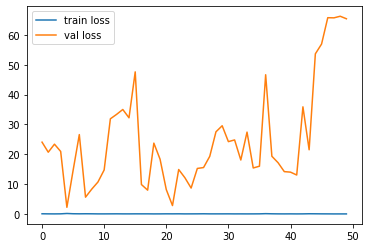

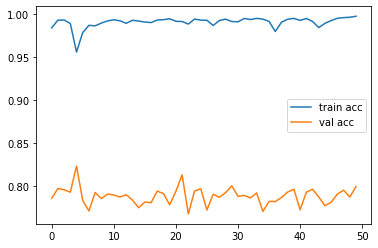

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('Updatedmodel_.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[1.08071638e-03, 3.28080803e-02, 1.40938358e-02, 9.52017426e-01],
       [6.48212081e-05, 3.76272453e-07, 9.98108983e-01, 1.82576303e-03],
       [9.98069108e-01, 4.38354881e-08, 2.79694970e-04, 1.65126985e-03],
       [1.90574420e-03, 6.20834953e-07, 9.98076916e-01, 1.66221180e-05],
       [2.93544168e-03, 2.18342058e-03, 1.03987521e-02, 9.84482408e-01],
       [1.23585598e-03, 1.37195078e-04, 9.93926585e-01, 4.70046466e-03],
       [5.18485345e-03, 9.52562571e-01, 1.32831134e-04, 4.21197526e-02],
       [4.34744754e-04, 1.28285792e-02, 3.98747995e-03, 9.82749104e-01],
       [8.25350955e-02, 3.11684459e-01, 3.73537302e-01, 2.32243121e-01],
       [7.13894069e-01, 1.14700936e-01, 1.23989824e-02, 1.59005970e-01],
       [1.23955928e-01, 3.05530787e-01, 3.02462336e-02, 5.40267050e-01],
       [2.72632996e-03, 2.09897235e-02, 2.10788921e-02, 9.55205083e-01],
       [5.82802715e-03, 4.64445323e-01, 3.76655348e-02, 4.92061198e-01],
       [2.54945271e-03, 2.06118330e-06, 3.14365199e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([3, 2, 0, 2, 3, 2, 1, 3, 2, 0, 3, 3, 3, 3, 2, 1, 1, 2], dtype=int64)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'